In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline

from scipy.integrate import solve_ivp

%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png', 'pdf')

# Problem 12.12

$T_1=\frac{T_0}{\tau s+1}+\frac{kG_c}{\tau s+1}E$

$T_3=\frac{T_1}{\left(\tau s + 1\right)^2}$

$E=T_{sp}-T_3$

$T_3=\frac{\frac{T_0}{\tau s+1}+\frac{kG_c}{\tau s+1}E}{\left(\tau s + 1\right)^2}$

$T_3=\frac{T_0}{\left(\tau s + 1\right)^3}+\frac{kG_c}{\left(\tau s+1\right)^3}E$

$T_3=\frac{T_0}{\left(\tau s + 1\right)^3}+\frac{kG_c}{\left(\tau s+1\right)^3}T_{sp}-\frac{kG_c}{\left(\tau s+1\right)^3}T_3$

$T_3\left(1+\frac{kG_c}{\left(\tau s+1\right)^3}\right)=\frac{T_0}{\left(\tau s + 1\right)^3}+\frac{kG_c}{\left(\tau s+1\right)^3}T_{sp}$

$T_3\left(\left(\tau s+1\right)^3+kG_c\right)=T_0+kG_cT_{sp}$

$T_3=\frac{1}{\left(\tau s+1\right)^3+kG_c}T_0+\frac{kG_c}{\left(\tau s+1\right)^3+kG_c}T_{sp}$

## Part A

### P controller

$G_c=k_c$

$T_3=\frac{1}{\left(\tau s+1\right)^3+kk_c}T_0+\frac{kG_c}{\left(\tau s+1\right)^3+kk_c}T_{sp}$

Denominator $=\tau^3s^3+3\tau^2s^2+3\tau s + 1 + kk_c$

Routh array;

$a_0=\tau^3$ $a_2=3\tau$

$a_1=3\tau^2$ $a_3=1 + kk_c$

$B_1=\frac{9\tau^3-\tau^3\left(1 + kk_c\right)}{3\tau^2}$

$C_1=1 + kk_c$

$\frac{9\tau^3-\tau^3\left(1 + kk_c\right)}{3\tau^2}>0$

$9>1 + kk_c$

$k_c<\frac{8}{k}$

$1 + kk_c>0$

$k_c>-\frac{1}{k}$

$\boxed{-\frac{1}{k}<k_c<\frac{8}{k}}$

### PD controller

$G_c=k_c\left(1+\tau_Ds\right)$

Denominator $=\tau^3s^3+3\tau^2s^2+3\tau s + 1 + kk_c\left(1+\tau_Ds\right)$

Routh array;

$a_0=\tau^3$ $a_2=3\tau+k_c\tau_D$

$a_1=3\tau^2$ $a_3=1 + kk_c$

$B_1=\frac{3\tau^2\left(3\tau+k_c\tau_D\right)-\tau^3\left(1 + kk_c\right)}{3\tau^2}$

$\frac{3\tau^2\left(3\tau+k_c\tau_D\right)-\tau^3\left(1 + kk_c\right)}{3\tau^2}>0$

$3\left(3\tau+k_c\tau_D\right)-\tau\left(1 + kk_c\right)>0$

$8\tau+k_c\left(3\tau_D-\tau k\right)>0$

$k_c\left(\tau-\tau k\right)>-8\tau$

$k_c\left(1-k\right)>-8$

$k_c>\frac{8}{k-1}$

$\boxed{k_c>-\frac{1}{k}}$

Adding the derivative action to the proportional only controller has a stabilizing effect, and thus the PD controller can operate with a broader range of $k_c$ values than the P only controller.

## Part B

$T_0$ step change

$T_0(s)=\frac{M}{s}$

$T_3=\frac{1}{\left(\tau s+1\right)^3+kk_c}\cdot\frac{M}{s}$

Final value theorem:

$$\lim_{s\rightarrow0^+}sY(s)=\lim_{t\rightarrow\infty}y(t)$$

$sT_3=\frac{M}{\left(\tau s+1\right)^3+kk_c}$

$\lim_{s\rightarrow0^+}sT_3=\lim_{s\rightarrow0^+}\frac{M}{\left(\tau s+1\right)^3+kk_c}=\frac{M}{1+kk_c}$

Final $T_0=0$

Offset $=0-T_3=0-\frac{M}{1+kk_c}$

Largest $k_c=\frac{8}{k}$

Offset $=-\frac{M}{1+k\frac{8}{k}}$

Smallest possible offset $=\boxed{-\frac{M}{9}}$

# Problem 12.13

## Part A

$C_P=\frac{G_cG_P}{1+G_cG_P}C_{P_{sp}}+\frac{G'}{1+G_cG_P}C_{in,R}$ 

$G'=\frac{2}{\left(s+1\right)\left(s+2\right)}$

$G_P=\frac{4-s}{\left(s+1\right)\left(s+2\right)}$

$C_P=\frac{G_c\frac{4-s}{\left(s+1\right)\left(s+2\right)}}{1+G_c\frac{4-s}{\left(s+1\right)\left(s+2\right)}}C_{P_{sp}}+\frac{\frac{2}{\left(s+1\right)\left(s+2\right)}}{1+G_c\frac{4-s}{\left(s+1\right)\left(s+2\right)}}C_{in,R}$ 

$C_P=\frac{G_c\left(4-s\right)}{s^2+3s+2+G_c\left(4-s\right)}C_{P_{sp}}+\frac{2}{s^2+3s+2+G_c\left(4-s\right)}C_{in,R}$ 

### P controller

$G_c=k_c$

Denominator $=s^2+3s+2+k_c\left(4-s\right)=s^2+\left(4k_c+2\right)s+4k_c+2$

Routh array:

$a_0=1$ $a_2=4k_c+2$

$a_1=3-k_c$ $a_3=0$

$B_1=4k_c+2$

$k_c>-\frac{1}{2}$

$3-k_c>0$

$k_c<3$

$\boxed{-\frac{1}{2}<k_c<3}$

### PI controller

$G_c=k_c\left(1+\frac{1}{\tau_Is}\right)=k_c\left(1+\frac{4}{s}\right)$

Denominator $=s^2+3s+2+k_c\left(1+\frac{4}{s}\right)\left(4-s\right)=s^3+\left(3-k_c\right)+2s+16k_c$

Routh array:

$a_0=1$ $a_2=2$

$a_1=3-k_c$ $a_3=16k_c$

$B_1=\frac{6-2k_c-16k_c}{3-k_c}$

$\frac{6-2k_c-16k_c}{3-k_c}>0$

$6-2k_c-16k_c>0$

$k_c<\frac{1}{3}$

$C_1=16k_c$

$16k_c>0$

$k_c>0$

$\boxed{0<k_c<\frac{1}{3}}$

Adding the integral action to the proportional only controller has a destabilizing effect on the system, and thus the PI controller requires a narrower range of $k_c$ to operate with stability.

## Part B

$C_P=\frac{k_c\left(4-s\right)}{s^2+3s+2+k_c\left(4-s\right)}C_{P_{sp}}+\frac{2}{s^2+3s+2+k_c\left(4-s\right)}C_{in,R}$

$C_{P_{sp}}=\frac{M}{s}$

$C_P=\frac{k_c\left(4-s\right)}{s^2+3s+2+k_c\left(4-s\right)}\cdot\frac{M}{s}$

Final value theorem:

$$\lim_{s\rightarrow0^+}sY(s)=\lim_{t\rightarrow\infty}y(t)$$

$sC_P=\frac{Mk_c\left(4-s\right)}{s^2+3s+2+k_c\left(4-s\right)}$

$\lim_{s\rightarrow0^+}sC_P=\frac{2Mk_c}{2k_c+1}$

Offset $=c_{P_{sp}}(t)-c_P(t)=M-\lim_{t\rightarrow\infty}c_P(t)$

Offset $=M-\frac{2Mk_c}{2k_c+1}=M\left(\frac{2k_c+1}{2k_c+1}-\frac{2k_c}{2k_c+1}\right)$

Offset $=\frac{M}{2k_c+1}$

Maximum $k_c=3$

Minimum offset $=\boxed{\frac{M}{7}}$

# Problem 13.4

### State space models

$A_1\frac{dh_1}{dt}=-\frac{h_1}{R_1}+k_vu+F_w$

$A_2\frac{dh_2}{dt}=\frac{h_1}{R_1}-\frac{h_2}{R_2}$

$\tau_m\frac{dh_{2,m}}{dt}+h_{2,m}=h_2$

### Real PID state space

$\frac{de_I}{dt}=e$

$\frac{de_f}{dt}=-\frac{1}{\alpha\tau_D}e_f+\frac{1}{\alpha\tau_D}e$

$u=\frac{k_c}{\tau_I}e_I+k_c\left(1-\frac{1}{\alpha}\right)e_f+\frac{k_c}{\alpha}e$

$e=h_{2,sp}-h_{2,m}$

$\frac{de_I}{dt}=h_{2,sp}-h_{2,m}$

$\frac{de_f}{dt}=-\frac{1}{\alpha\tau_D}e_f+\frac{1}{\alpha\tau_D}\left(h_{2,sp}-h_{2,m}\right)$

$u=\frac{k_c}{\tau_I}e_I+k_c\left(1-\frac{1}{\alpha}\right)e_f+\frac{k_c}{\alpha}\left(h_{2,sp}-h_{2,m}\right)$

$A_1\frac{dh_1}{dt}=-\frac{h_1}{R_1}+k_v\left(\frac{k_c}{\tau_I}e_I+k_c\left(1-\frac{1}{\alpha}\right)e_f+\frac{k_c}{\alpha}\left(h_{2,sp}-h_{2,m}\right)\right)+F_w$

## State space model that describes the system

$$\frac{dh_1}{dt}=-\frac{1}{A_{1}R_{1}}h_1-\frac{k_{c}k_{v}}{A_{1}\alpha}h_{2,m}+\frac{k_{c}k_{v}}{A_{1}\tau_{I}}e_I+\left(\frac{k_{c}k_{v}}{A_{1}}-\frac{k_{c}k_{v}}{A_{1}\alpha}\right)e_f+\frac{1}{A_{1}}F_w+\frac{k_{c}k_{v}}{A_{1}\alpha}h_{2,sp}$$

$$\frac{dh_2}{dt}=\frac{1}{A_2R_1}h_1-\frac{1}{A_2R_2}h_2$$

$$\frac{dh_{2,m}}{dt}=\frac{1}{\tau_m}h_2-\frac{1}{\tau_m}h_{2,m}$$

$$\frac{de_I}{dt}=-h_{2,m}+h_{2,sp}$$

$$\frac{de_f}{dt}=-\frac{1}{\alpha\tau_D}h_{2,m}-\frac{1}{\alpha\tau_D}e_f+\frac{1}{\alpha\tau_D}h_{2,sp}$$

## System Simulation

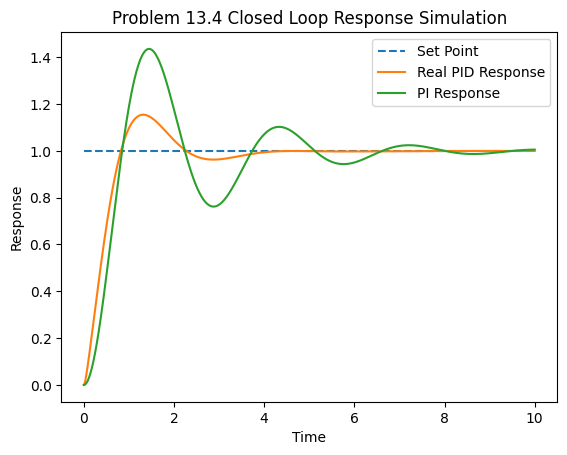

In [2]:
# 13.4 simulation
ode_kwargs = {
    'method': 'Radau',
    'rtol': 1e-8,
    'atol': 1e-8,
}

t_range = [0, 10]

initial_cond = [0, 0, 0, 0, 0]

def real_pid_ode(t, y):
    f = y*0

    h_1 = y[0]
    h_2 = y[1]
    h_2m = y[2]
    e_I = y[3]
    e_f = y[4]

    h_2sp = 1
    F_w = 0

    k_c = 5
    tau_I = 2
    tau_D = 0.25
    alpha = 0.1
    tau_m = 0.1
    A_1, A_2, R_1, R_2, k_v = 1, 1, 1, 1, 1

    e = h_2sp - h_2m

    u = k_c * (e_I / tau_I + (1 - 1 / alpha) * e_f + e / alpha)

    f[0] = (-h_1 / R_1 + k_v * u + F_w) / A_1
    f[1] = (h_1 / R_1 - h_2 / R_2) / A_2
    f[2] = (h_2 - h_2m) / tau_m
    f[3] = e
    f[4] = (e - e_f) / (alpha * tau_D)

    return f

def pi_ode(t, y):
    f = y*0

    h_1 = y[0]
    h_2 = y[1]
    h_2m = y[2]
    e_I = y[3]

    h_2sp = 1
    F_w = 0

    k_c = 5
    tau_I = 2
    tau_m = 0.1
    A_1, A_2, R_1, R_2, k_v = 1, 1, 1, 1, 1

    e = h_2sp - h_2m

    u = k_c * (e_I / tau_I + e)

    f[0] = (-h_1 / R_1 + k_v * u + F_w) / A_1
    f[1] = (h_1 / R_1 - h_2 / R_2) / A_2
    f[2] = (h_2 - h_2m) / tau_m
    f[3] = e

    return f

real_pid_sol = solve_ivp(real_pid_ode, t_range, initial_cond, **ode_kwargs)

pi_sol = solve_ivp(pi_ode, t_range, initial_cond[:4], **ode_kwargs)

plt.plot(real_pid_sol.t, np.ones(real_pid_sol.t.shape[0]), '--', label='Set Point')
plt.plot(real_pid_sol.t, real_pid_sol.y[1], label='Real PID Response')
plt.plot(pi_sol.t, pi_sol.y[1], label="PI Response")
plt.xlabel('Time')
plt.ylabel('Response')
plt.title('Problem 13.4 Closed Loop Response Simulation')
plt.legend()

### Comparison

Both the PI and PID controller are able to get the system to the set point. The PID controller is able to get the system to the set point faster than PI controller. The PI controller has more variation from the set point than the PID controller.